# 04b differentially expressed genes - dmPGE2

Goal:

Generate lists with overlapping genes for MPPs and HSCs and to assess specificity. Three levels of stringency 1.5 fold, 1.2 fold and all differentially expressed genes by MAST. 


done with this docker image:

docker run \
--rm \
-d \
--name scanpy2 \
-p 8880:8888 \
-e JUPYTER_ENABLE_LAB=YES \
-v /Users/efast/Documents/:/home/jovyan/work \
scanpy:1.4.6


['MPP_Primed', 'MPP_Metabolism', 'MPP_Stem cell', 'MPP_Cell-cycle', 'MPP_Acute-Activation', 
 'MPP_Interferon', 'MPP_Interferon cell-cycle','MPP_Myeloid', 'MPP_all']

['HSC_Metabolism', 'HSC_Quiescent', 'HSC_Activated', 'HSC_Interferon', 
           'HSC_Acute-Activation', 'HSC_Cell-cycle', 'HSC_all']

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
from gprofiler import GProfiler
import scipy.stats as stats
from helper_functions import *

from upsetplot import UpSet
import re

## Read data

In [2]:
treatment = 'dmPGE2'

In [3]:
#Read data and make overlap files + save

files = ['1.2', '1.5', 'nocutoff']

for file in files:
    path_name_in = './write/MAST_overlap_' + file + '_' + treatment + '_all.csv'
    path_name_out = './write/' + treatment + '_combo_HSCs_MPPs_' + file + '.csv'
    results_df = pd.read_csv(path_name_in)
    results_df['MPP_any'] = results_df.apply (lambda row: make_categories_MPP(row), axis=1)
    results_df['HSC_any'] = results_df.apply (lambda row: make_categories_HSC(row), axis=1)
    results_df['overlap'] = results_df['HSC_any'] * results_df['MPP_any']
    df_compiled = results_df[['primerid','HSC_any','MPP_any','overlap']]
    df_compiled = df_compiled.set_index('primerid')
    df_compiled = df_compiled.dropna(how='all')
    df_compiled = df_compiled.fillna(0)
    df_compiled['specific'] = df_compiled.apply (lambda row: make_overlap_column(row), axis=1)
    df_compiled.to_csv(path_name_out, index=True, header=True)

### plot specific HSCs overlap

In [4]:
samples = ['HSC_Metabo', 'HSC_Quiesc', 'HSC_Activated', 'HSC_all']

#### 1.5 fold

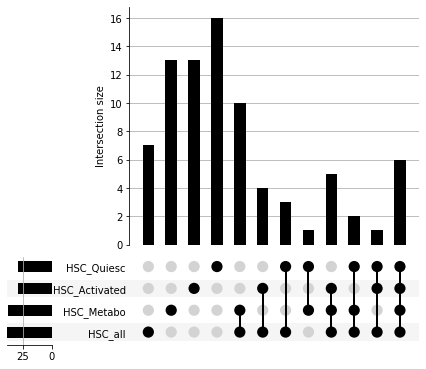

In [5]:
file = '1.5'
path_name_in_compiled = './write/' + treatment + '_combo_HSCs_MPPs_' + file + '.csv'
path_name_in_results = './write/MAST_overlap_' + file + '_' + treatment + '_all.csv'

df_compiled = pd.read_csv(path_name_in_compiled)
results_df = pd.read_csv(path_name_in_results)

results_df['MPP_any'] = results_df.apply (lambda row: make_categories_MPP(row), axis=1)
results_df['HSC_any'] = results_df.apply (lambda row: make_categories_HSC(row), axis=1)
results_df['overlap'] = results_df['HSC_any'] * results_df['MPP_any']

gene_list = df_compiled[df_compiled['specific'] == 'HSC_only']['primerid'].tolist()
subset_df = results_df[results_df['primerid'].isin(gene_list)]
df_filt, multiindex = calc_overlap(samples, subset_df)

upset = UpSet(multiindex, subset_size='count', intersection_plot_elements=10)
upset.plot()
plt.savefig('./figures/upsetplot_1.5_HSC_dmPGE2.pdf')

#### 1.2 fold

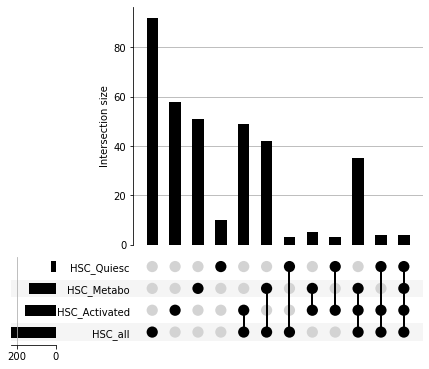

In [6]:
file = '1.2'

path_name_in_compiled = './write/' + treatment + '_combo_HSCs_MPPs_' + file + '.csv'
path_name_in_results = './write/MAST_overlap_' + file + '_' + treatment + '_all.csv'

df_compiled = pd.read_csv(path_name_in_compiled)
results_df = pd.read_csv(path_name_in_results)

results_df['MPP_any'] = results_df.apply (lambda row: make_categories_MPP(row), axis=1)
results_df['HSC_any'] = results_df.apply (lambda row: make_categories_HSC(row), axis=1)
results_df['overlap'] = results_df['HSC_any'] * results_df['MPP_any']

gene_list = df_compiled[df_compiled['specific'] == 'HSC_only']['primerid'].tolist()
subset_df = results_df[results_df['primerid'].isin(gene_list)]
df_filt, multiindex = calc_overlap(samples, subset_df)

upset = UpSet(multiindex, subset_size='count', intersection_plot_elements=10)
upset.plot()
plt.savefig('./figures/upsetplot_1.2_HSC_dmPGE2.pdf')

#### all

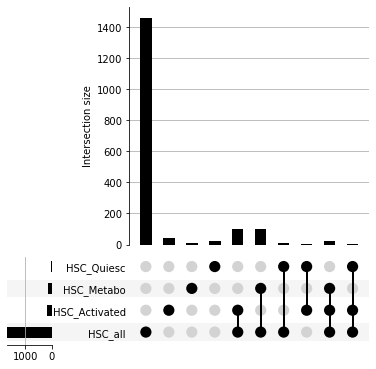

In [7]:
file = 'nocutoff'

path_name_in_compiled = './write/' + treatment + '_combo_HSCs_MPPs_' + file + '.csv'
path_name_in_results = './write/MAST_overlap_' + file + '_' + treatment + '_all.csv'

df_compiled = pd.read_csv(path_name_in_compiled)
results_df = pd.read_csv(path_name_in_results)

results_df['MPP_any'] = results_df.apply (lambda row: make_categories_MPP(row), axis=1)
results_df['HSC_any'] = results_df.apply (lambda row: make_categories_HSC(row), axis=1)
results_df['overlap'] = results_df['HSC_any'] * results_df['MPP_any']

gene_list = df_compiled[df_compiled['specific'] == 'HSC_only']['primerid'].tolist()
subset_df = results_df[results_df['primerid'].isin(gene_list)]
df_filt, multiindex = calc_overlap(samples, subset_df)

upset = UpSet(multiindex, subset_size='count', intersection_plot_elements=10)
upset.plot()
plt.savefig('./figures/upsetplot_all_HSC_dmPGE2.pdf')

### plot specific MPPs overlap

In [8]:
samples = ['MPP_Primed', 'MPP_Metabo', 'MPP_Stem cell', 'MPP_Cell-cycle', 'MPP_all']

#### 1.5 fold

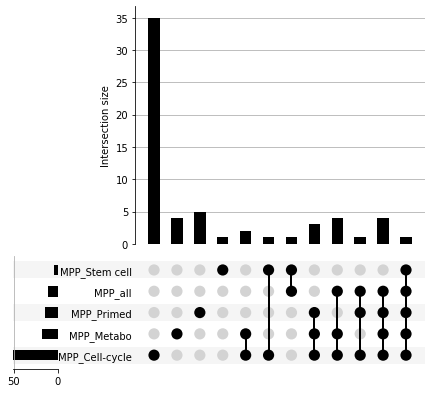

In [9]:
file = '1.5'
path_name_in_compiled = './write/' + treatment + '_combo_HSCs_MPPs_' + file + '.csv'
path_name_in_results = './write/MAST_overlap_' + file + '_' + treatment + '_all.csv'

df_compiled = pd.read_csv(path_name_in_compiled)
results_df = pd.read_csv(path_name_in_results)

results_df['MPP_any'] = results_df.apply (lambda row: make_categories_MPP(row), axis=1)
results_df['HSC_any'] = results_df.apply (lambda row: make_categories_HSC(row), axis=1)
results_df['overlap'] = results_df['HSC_any'] * results_df['MPP_any']

gene_list = df_compiled[df_compiled['specific'] == 'MPP_only']['primerid'].tolist()
subset_df = results_df[results_df['primerid'].isin(gene_list)]
df_filt, multiindex = calc_overlap(samples, subset_df)

upset = UpSet(multiindex, subset_size='count', intersection_plot_elements=10)
upset.plot()
plt.savefig('./figures/upsetplot_1.5_MPP_dmPGE2.pdf')

In [10]:
multiindex.head()

primerid  \
MPP_Primed MPP_Metabo MPP_Stem cell MPP_Cell-cycle MPP_all                  
False      False      False         True           False    1700017B05Rik   
True       False      False         True           True           Abhd17b   
           True       False         True           False           Akap13   
False      False      False         True           False           Arid5a   
                                                   False            Aurka   

                                                            Unnamed: 0  \
MPP_Primed MPP_Metabo MPP_Stem cell MPP_Cell-cycle MPP_all               
False      False      False         True           False           NaN   
True       False      False         True           True            NaN   
           True       False         True           False           NaN   
False      False      False         True           False           NaN   
                                                   False           NaN   

                                                            Pr(>Chisq)  coef  \
MPP_Primed MPP_Metabo MPP_Stem cell MPP_Cell-cycle MPP_all                     
False      False      False         True           False           NaN   NaN   
True       False      False         True           True            NaN   NaN   
           True       False         True           False           NaN   NaN   
False      False      False         True           False           NaN   NaN   
                                                   False           NaN   NaN   

                                                            FDR  \
MPP_Primed MPP_Metabo MPP_Stem cell MPP_Cell-cycle MPP_all        
False      False      False         True           False    NaN   
True       False      False         True           True     NaN   
           True       False         True           False    NaN   
False      False      False         True           False    NaN   
                                                   False    NaN   

                                                            Unnamed: 0LT_1  \
MPP_Primed MPP_Metabo MPP_Stem cell MPP_Cell-cycle MPP_all                   
False      False      False         True           False               NaN   
True       False      False         True           True                NaN   
           True       False         True           False               NaN   
False      False      False         True           False               NaN   
                                                   False               NaN   

                                                            Pr(>Chisq)LT_1  \
MPP_Primed MPP_Metabo MPP_Stem cell MPP_Cell-cycle MPP_all                   
False      False      False         True           False               NaN   
True       False      False         True           True                NaN   
           True       False         True           False               NaN   
False      False      False         True           False               NaN   
                                                   False               NaN   

                                                            coefLT_1  FDRLT_1  \
MPP_Primed MPP_Metabo MPP_Stem cell MPP_Cell-cycle MPP_all                      
False      False      False         True           False         NaN      NaN   
True       False      False         True           True          NaN      NaN   
           True       False         True           False         NaN      NaN   
False      False      False         True           False         NaN      NaN   
                                                   False         NaN      NaN   

                                                            Unnamed: 0LT_2  \
MPP_Primed MPP_Metabo MPP_Stem cell MPP_Cell-cycle MPP_all                   
False      False      False         True           False               NaN   
True       False      False         True           True                NaN   
 

In [11]:
# get the genes that are specific for MPPs_3

gprofiler_list = multiindex.loc[(False, False, False, True, False), :]['primerid'].tolist()
gene_name_annotation_long(gprofiler_list)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1418: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


,incoming,short_description
0,1700017B05Rik,RIKEN cDNA 1700017B05 gene
1,Arid5a,AT rich interactive domain 5A (MRF1-like)
2,Aurka,aurora kinase A
3,Ccnb1,cyclin B1
4,Cdc20,cell division cycle 20
5,Cdc42ep3,CDC42 effector protein (Rho GTPase binding) 3
6,Cdca2,cell division cycle associated 2
7,Cdk1,cyclin-dependent kinase 1
8,Cenpe,centromere protein E
9,Cenpf,centromere protein F


#### 1.2 fold

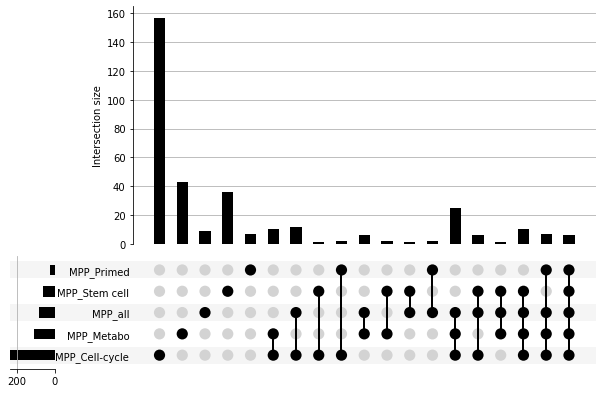

In [12]:
file = '1.2'

path_name_in_compiled = './write/' + treatment + '_combo_HSCs_MPPs_' + file + '.csv'
path_name_in_results = './write/MAST_overlap_' + file + '_' + treatment + '_all.csv'

df_compiled = pd.read_csv(path_name_in_compiled)
results_df = pd.read_csv(path_name_in_results)

results_df['MPP_any'] = results_df.apply (lambda row: make_categories_MPP(row), axis=1)
results_df['HSC_any'] = results_df.apply (lambda row: make_categories_HSC(row), axis=1)
results_df['overlap'] = results_df['HSC_any'] * results_df['MPP_any']

gene_list = df_compiled[df_compiled['specific'] == 'MPP_only']['primerid'].tolist()
subset_df = results_df[results_df['primerid'].isin(gene_list)]
df_filt, multiindex = calc_overlap(samples, subset_df)

upset = UpSet(multiindex, subset_size='count', intersection_plot_elements=10)
upset.plot()
plt.savefig('./figures/upsetplot_1.2_MPP_dmPGE2.pdf')

In [13]:
# get the genes that are specific for MPPs_3

gprofiler_list = multiindex.loc[(False, False, False, True, False), :]['primerid'].tolist()

databases = ["GO:MF","GO:CC","GO:BP","KEGG","REAC"]
pathway_enrich(gprofiler_list, databases)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1418: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


,p_value,term_size,intersection_size,recall,name
native,,,,,
GO:0051301,2.455127e-41,567,52,0.091711,cell division
GO:0022402,1.479569e-37,1128,62,0.054965,cell cycle process
GO:0007049,4.112449e-36,1726,71,0.041136,cell cycle
GO:1903047,5.373027e-36,660,50,0.075758,mitotic cell cycle process
GO:0005819,1.864556e-34,360,40,0.111111,spindle
GO:0000278,6.352755e-33,856,52,0.060748,mitotic cell cycle
GO:0007059,7.942292e-31,325,36,0.110769,chromosome segregation
GO:0098813,2.321541e-28,265,32,0.120755,nuclear chromosome segregation
GO:0000819,1.537754e-27,183,28,0.153005,sister chromatid segregation


#### all

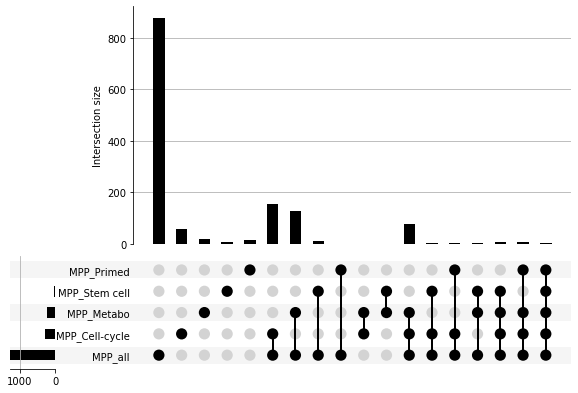

In [14]:
file = 'nocutoff'

path_name_in_compiled = './write/' + treatment + '_combo_HSCs_MPPs_' + file + '.csv'
path_name_in_results = './write/MAST_overlap_' + file + '_' + treatment + '_all.csv'

df_compiled = pd.read_csv(path_name_in_compiled)
results_df = pd.read_csv(path_name_in_results)

results_df['MPP_any'] = results_df.apply (lambda row: make_categories_MPP(row), axis=1)
results_df['HSC_any'] = results_df.apply (lambda row: make_categories_HSC(row), axis=1)
results_df['overlap'] = results_df['HSC_any'] * results_df['MPP_any']

gene_list = df_compiled[df_compiled['specific'] == 'MPP_only']['primerid'].tolist()
subset_df = results_df[results_df['primerid'].isin(gene_list)]
df_filt, multiindex = calc_overlap(samples, subset_df)

upset = UpSet(multiindex, subset_size='count', intersection_plot_elements=10)
upset.plot()
plt.savefig('./figures/upsetplot_all_MPP_dmPGE2.pdf')

### plot specific MPPs overlap looking at surface markers

In [15]:
samples = ['MPP', 'MPP1', 'MPP2', 'MPP3/4']


#### 1.5 fold

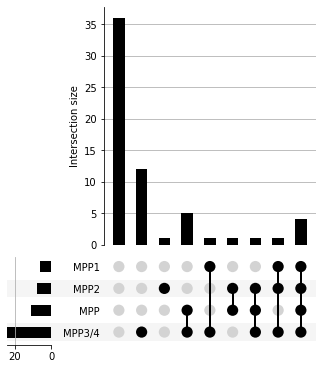

In [16]:
file = '1.5'
path_name_in_compiled = './write/' + treatment + '_combo_HSCs_MPPs_' + file + '.csv'
path_name_in_results = './write/MAST_overlap_' + file + '_' + treatment + '_all.csv'

df_compiled = pd.read_csv(path_name_in_compiled)
results_df = pd.read_csv(path_name_in_results)

results_df['MPP_any'] = results_df.apply (lambda row: make_categories_MPP(row), axis=1)
results_df['HSC_any'] = results_df.apply (lambda row: make_categories_HSC(row), axis=1)
results_df['overlap'] = results_df['HSC_any'] * results_df['MPP_any']

gene_list = df_compiled[df_compiled['specific'] == 'MPP_only']['primerid'].tolist()
subset_df = results_df[results_df['primerid'].isin(gene_list)]
df_filt, multiindex = calc_overlap(samples, subset_df)

upset = UpSet(multiindex, subset_size='count', intersection_plot_elements=10)
upset.plot()
plt.savefig('./figures/upsetplot_1.5_MPP_surf_dmPGE2.pdf')

In [17]:
# get the genes that are missed by the surface markers

gprofiler_list = multiindex.loc[(False, False, False, False), :]['primerid'].tolist()
gene_name_annotation_long(gprofiler_list)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1418: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


,incoming,short_description
0,1700017B05Rik,RIKEN cDNA 1700017B05 gene
1,Aurka,aurora kinase A
2,Ccl4,chemokine (C-C motif) ligand 4
3,Ccnb1,cyclin B1
4,Cdc20,cell division cycle 20
5,Cdc42ep3,CDC42 effector protein (Rho GTPase binding) 3
6,Cdca2,cell division cycle associated 2
7,Cdk1,cyclin-dependent kinase 1
8,Cenpe,centromere protein E
9,Cenpf,centromere protein F


#### 1.2 fold

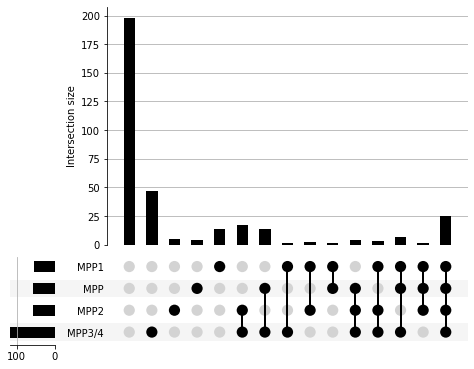

In [18]:
file = '1.2'

path_name_in_compiled = './write/' + treatment + '_combo_HSCs_MPPs_' + file + '.csv'
path_name_in_results = './write/MAST_overlap_' + file + '_' + treatment + '_all.csv'

df_compiled = pd.read_csv(path_name_in_compiled)
results_df = pd.read_csv(path_name_in_results)

results_df['MPP_any'] = results_df.apply (lambda row: make_categories_MPP(row), axis=1)
results_df['HSC_any'] = results_df.apply (lambda row: make_categories_HSC(row), axis=1)
results_df['overlap'] = results_df['HSC_any'] * results_df['MPP_any']

gene_list = df_compiled[df_compiled['specific'] == 'MPP_only']['primerid'].tolist()
subset_df = results_df[results_df['primerid'].isin(gene_list)]
df_filt, multiindex = calc_overlap(samples, subset_df)

upset = UpSet(multiindex, subset_size='count', intersection_plot_elements=10)
upset.plot()
plt.savefig('./figures/upsetplot_1.2_MPP_surf_dmPGE2.pdf')

#### all

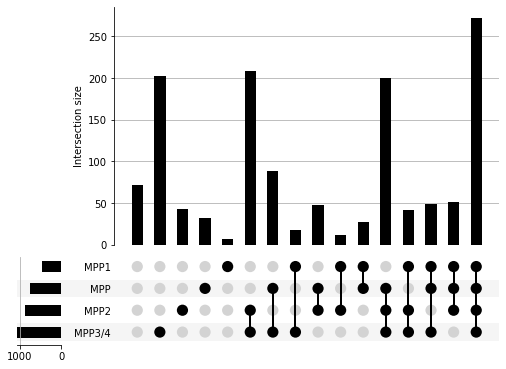

In [19]:
file = 'nocutoff'

path_name_in_compiled = './write/' + treatment + '_combo_HSCs_MPPs_' + file + '.csv'
path_name_in_results = './write/MAST_overlap_' + file + '_' + treatment + '_all.csv'

df_compiled = pd.read_csv(path_name_in_compiled)
results_df = pd.read_csv(path_name_in_results)

results_df['MPP_any'] = results_df.apply (lambda row: make_categories_MPP(row), axis=1)
results_df['HSC_any'] = results_df.apply (lambda row: make_categories_HSC(row), axis=1)
results_df['overlap'] = results_df['HSC_any'] * results_df['MPP_any']

gene_list = df_compiled[df_compiled['specific'] == 'MPP_only']['primerid'].tolist()
subset_df = results_df[results_df['primerid'].isin(gene_list)]
df_filt, multiindex = calc_overlap(samples, subset_df)

upset = UpSet(multiindex, subset_size='count', intersection_plot_elements=10)
upset.plot()
plt.savefig('./figures/upsetplot_all_MPP_surf_dmPGE2.pdf')

### how to get the values out

In [20]:
# this is how to get the values/lenght of the bars

multiindex.loc[(True, True, True, True), :]['primerid'].count()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1418: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


272

In [21]:
# this is how to get the size of all MPP3_surf (bar on the side)

multiindex[~multiindex['coefMPP3_surf'].isnull()]['primerid'].count()

1077

In [22]:
!pip list

Package                Version            
---------------------- -------------------
alembic                1.3.0              
anndata                0.7.1              
async-generator        1.10               
attrs                  19.3.0             
backcall               0.1.0              
beautifulsoup4         4.8.1              
bleach                 3.1.0              
blinker                1.4                
bokeh                  1.3.4              
cellbrowser            0.7.7              
certifi                2020.4.5.1         
certipy                0.1.3              
cffi                   1.13.2             
chardet                3.0.4              
Click                  7.0                
cloudpickle            1.2.2              
conda                  4.7.12             
conda-package-handling 1.6.0              
cryptography           2.8                
cycler                 0.10.0             
Cython                 0.29.14            
cytoolz    